<a href="https://colab.research.google.com/github/benvictoria21/MachineLearning/blob/master/KNearest_Neighbors_%26_Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix as plt_conf
import pandas as pd

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/MachineLearning/master/dataset/drug200.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [23]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [24]:
X=df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [25]:
la_sex=LabelEncoder()
la_sex.fit(['F','M'])
X[:,1]=la_sex.transform(X[:,1])

la_bp=LabelEncoder()
la_bp.fit(['LOW','NORMAL','HIGH'])
X[:,2]=la_bp.transform(X[:,2])

la_chol=LabelEncoder()
la_chol.fit(['NORMAL','HIGH'])
X[:,3]=la_chol.transform(X[:,3])
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [26]:
y=df['Drug'].values
y[0:5]

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY'], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [30]:
import numpy as np

In [31]:
from sklearn.neighbors import KNeighborsClassifier
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfusionMx=[];
for n in range(1,Ks):
    #Train Model and Predict
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.63333333, 0.61666667, 0.66666667, 0.6       , 0.65      ,
       0.58333333, 0.63333333, 0.65      , 0.63333333])

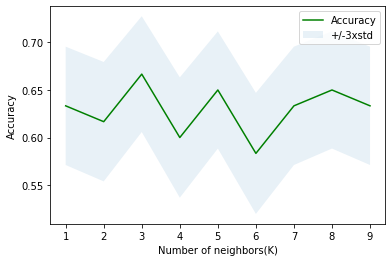

In [33]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors(K)')
plt.show()

In [34]:
print('The best accuracy = ',mean_acc.max(),'with K = ',mean_acc.argmax()+1)

The best accuracy =  0.6666666666666666 with K =  3


In [35]:
from sklearn.tree import DecisionTreeClassifier
drugTree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
prediction=drugTree.predict(X_test)
print(prediction[0:5])
print(y_test[0:5])

['DrugY' 'drugX' 'drugX' 'drugX' 'drugX']
['DrugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [38]:
print('Decision Tree Accuracy Score: ',metrics.accuracy_score(y_test,prediction))

Decision Tree Accuracy Score:  0.9833333333333333


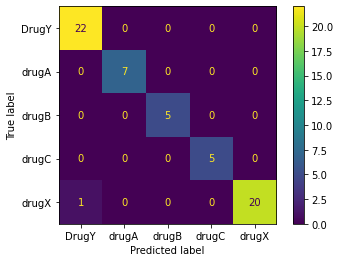

In [39]:
plt_conf(drugTree,X_test,y_test)
plt.show()